In [1]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
file = "/content/drive/MyDrive/해커톤/녹음.wav"

In [56]:
# load audio file with Librosa
sig, sr = librosa.load(file, sr=22050)
#초당 샘플갯수 sr

print(sig,sig.shape)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.2620228e-05 7.7436991e-05
 0.0000000e+00] (197098,)


Text(0.5, 1.0, 'Waveform')

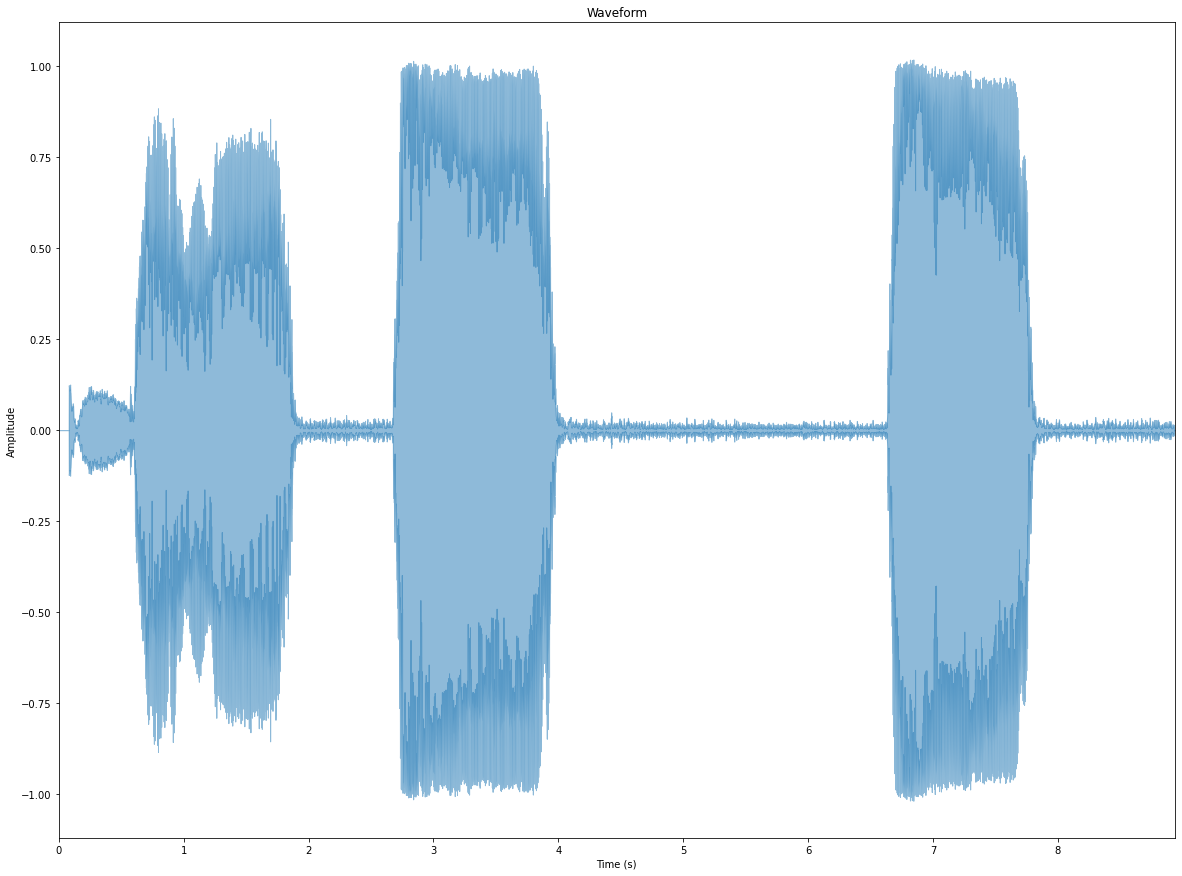

In [57]:
FIG_SIZE = (20,15)
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(sig, sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [58]:
len(sig)

197098

In [59]:
arr = []
cnt = 0
for qwer in range(len(sig)):
  if sig[qwer] > 0:
    arr.append(sig[qwer])
    cnt = 0
  else:
    if cnt < 2:
      arr.append(sig[qwer])
      cnt += 1

In [60]:
import numpy as np
sig  = np.array(arr)

In [61]:
len(sig)

110714

Text(0.5, 1.0, 'Waveform')

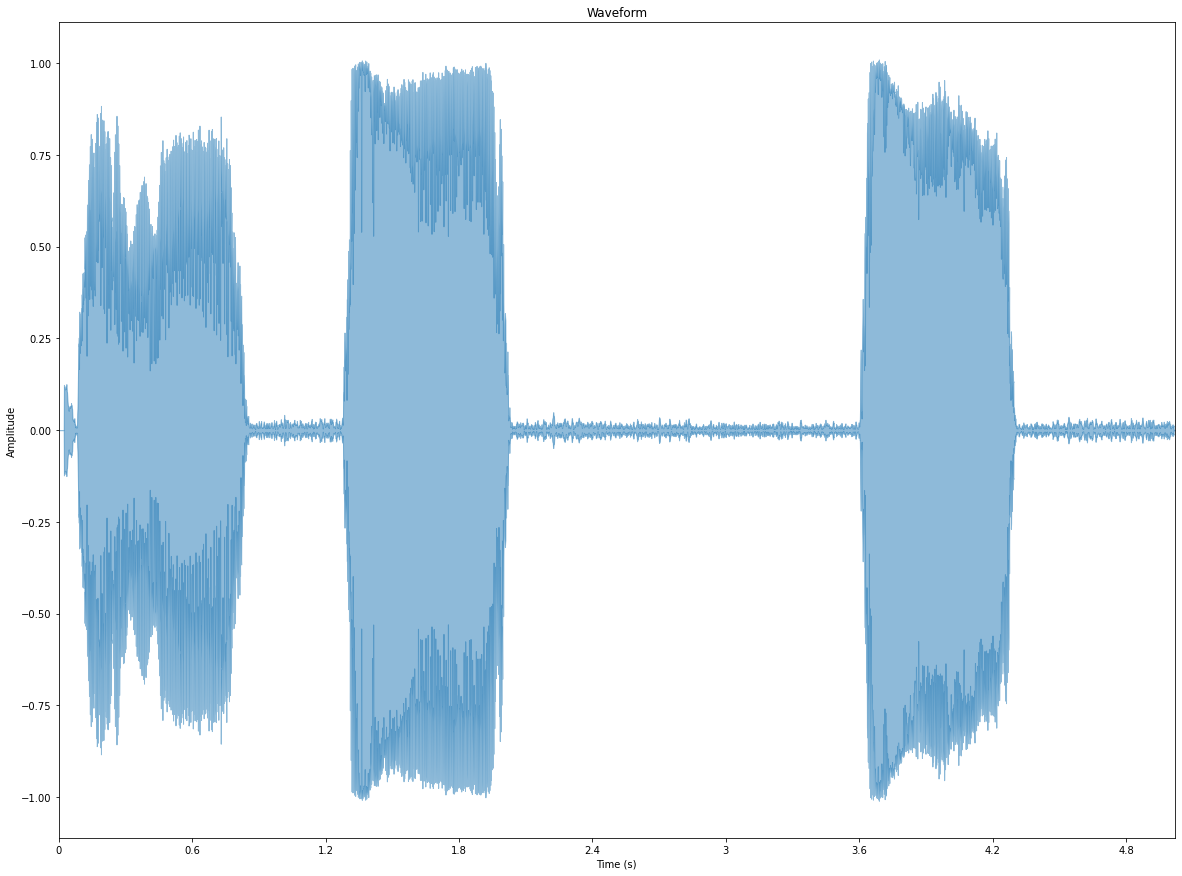

In [65]:
FIG_SIZE = (20,15)
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(sig, sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [54]:
sf.write('/content/drive/MyDrive/해커톤/music4.wav', sig, sr)

TypeError: ignored

Text(0.5, 1.0, 'Power spectrum')

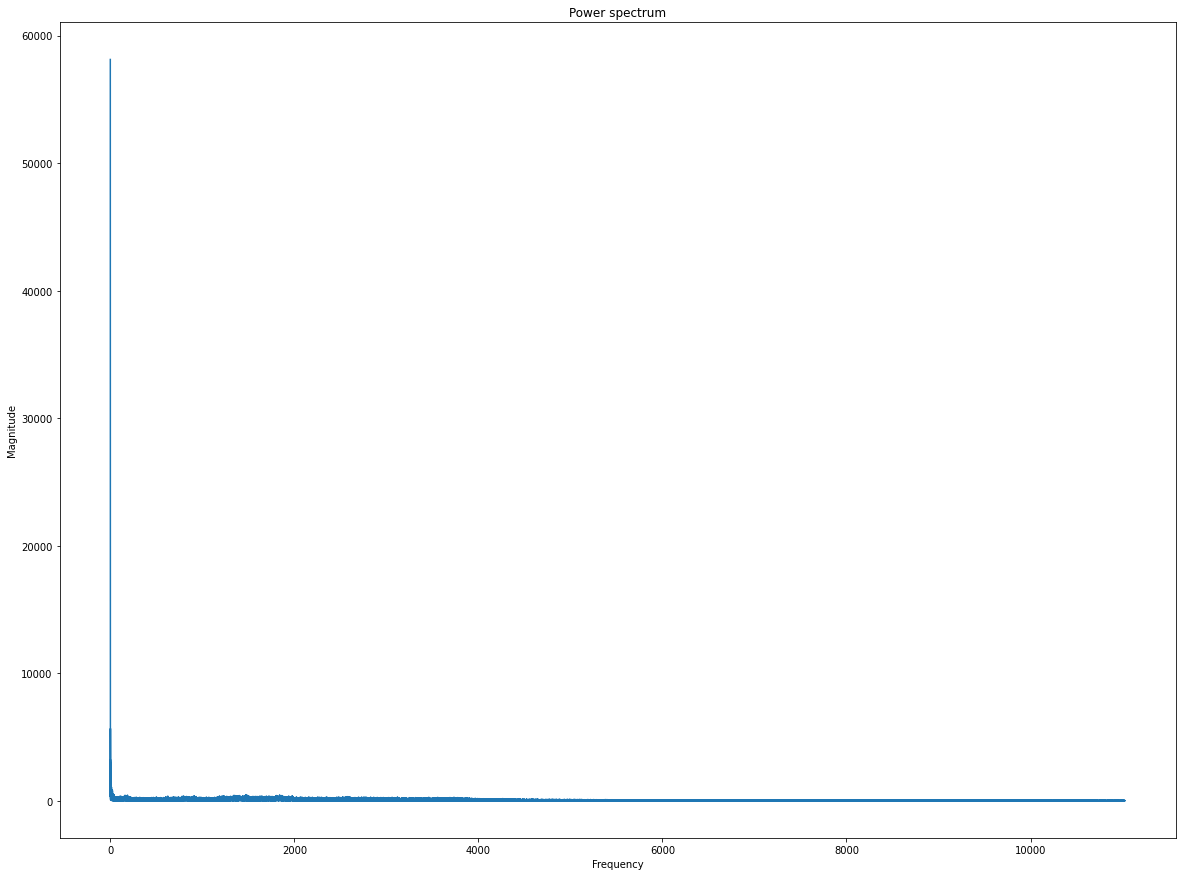

In [51]:
fft = np.fft.fft(sig)

# 복소공간 값 절댓갑 취해서, magnitude 구하기
magnitude = np.abs(fft) 

# Frequency 값 만들기
f = np.linspace(0,sr,len(magnitude))

# 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

Text(0.5, 1.0, 'Spectrogram (dB)')

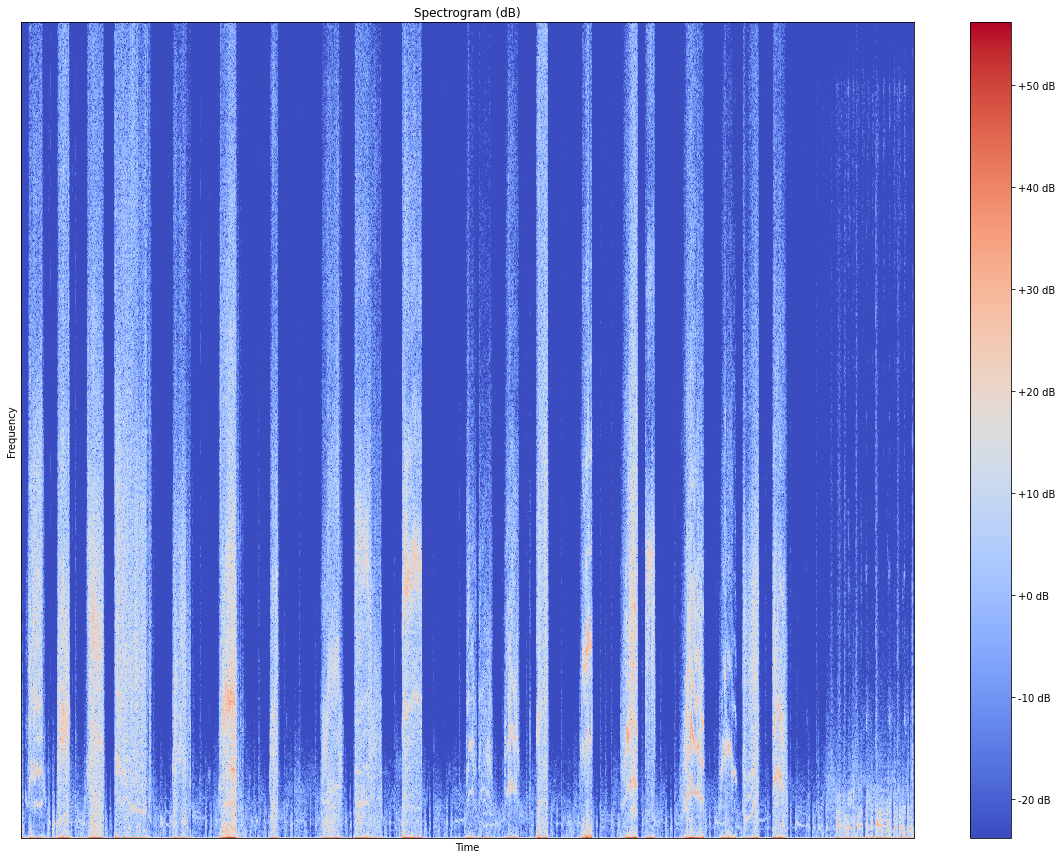

In [52]:
# STFT -> spectrogram
hop_length = 512  # 전체 frame 수
n_fft = 2048  # frame 하나당 sample 수

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

# STFT
stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

# 복소공간 값 절댓값 취하기
magnitude = np.abs(stft)

# magnitude > Decibels 
log_spectrogram = librosa.amplitude_to_db(magnitude)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

### https://hyunlee103.tistory.com/36

In [52]:
import soundfile as sf